In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Scatterplot Cost Model

In [3]:
df = pd.read_csv("../result/old_results/vis_lookup.csv")

In [4]:
x = np.array(df["nPts"])
y = np.array(df["scatter"])*1000
coeff, residuals, rank, singular_values, rcond = np.polyfit(x,y,1,full=True)

In [5]:
print ("Coefficients:",coeff)
print ("error:",residuals[0])

Coefficients: [3.64040264e-06 1.62985618e+00]
error: 37.346860494897136


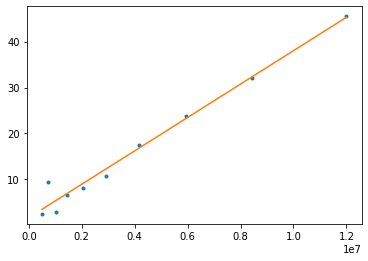

In [6]:
a = coeff[0]
b = coeff[1]
y_pred = a*x+b
plt.plot(x,y,'.')
plt.plot(x,y_pred,'-')

### Colored Scatterplot Cost Model

In [12]:
x = np.array(df["nPts"])
y = np.array(df["color_scatter"])*1000
coeff, residuals, rank, singular_values, rcond = np.polyfit(x,y,1,full=True)

In [13]:
print ("Coefficients:",coeff)
print ("error:",residuals[0])

Coefficients: [7.80722797e-05 4.63295120e+01]
error: 15069.071758295197


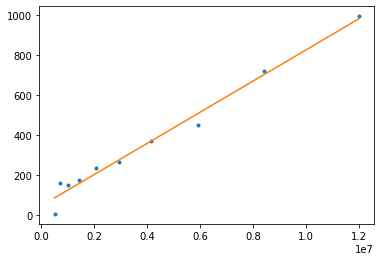

In [14]:
a = coeff[0]
b = coeff[1]
y_pred = a*x+b
plt.plot(x,y,'.')
plt.plot(x,y_pred,'-')

### Bar Chart Cost model 

In [318]:
df = pd.read_csv("../result/bar_processing.csv")
df["time"] = df["time"]*1000
bar = df[(df["G_color"]==0)]

In [319]:
import altair as alt

alt.Chart(bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_axes",type="nominal"),
)

alt.Chart(...)

In [370]:
N = np.array(bar["nPts"])
G_axes = np.array(bar["G_axes"])
y = np.array(bar["time"])
X = np.array([N,G_axes])

In [378]:
from scipy.optimize import curve_fit
def func(x, a, b,c,d):
    return a + b * x[0] +c*x[0]*x[1] + d*x[1]

In [379]:
popt, pcov = curve_fit(func, X,y)
popt

array([2.19393501e+01, 1.05243718e-04, 9.10971279e-09, 2.78259770e-03])

In [380]:
y_pred = func(X,*popt)

In [381]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 110.76966046959961


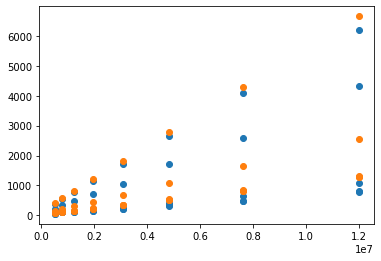

In [382]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Color Bar Chart Cost Model


In [326]:
df = pd.read_csv("../result/bar_processing.csv")
df["time"] = df["time"]*1000
color_bar = df[(df["G_color"]!=0)]

In [327]:
color_bar["ga*gc"]=color_bar["G_axes"]*color_bar["G_color"]

/Users/dorislee/.virtualenvs/lux/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [328]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_axes",type="nominal")
)

alt.Chart(...)

In [329]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_color",type="nominal")
).interactive()

alt.Chart(...)

In [330]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("ga*gc",type="nominal")
).interactive()

alt.Chart(...)

In [383]:
N = np.array(color_bar["nPts"])
G_axes = np.array(color_bar["G_axes"])
G_color = np.array(color_bar["G_color"])
y = np.array(color_bar["time"])
X = np.array([N,G_axes,G_color])

In [424]:
from scipy.optimize import curve_fit
def func(x, a, b,c,d,e,f,g):
    return a + b * x[0] + c*x[1]+ d*x[2] +e*x[0]*x[1] + f*x[1]*x[2]  + g*x[0]*x[2]

In [425]:
popt, pcov = curve_fit(func, X,y)
popt

array([ 6.21469091e+01,  1.31027750e-04,  1.89550172e-02, -1.87556507e-02,
        2.58539228e-08,  2.04057602e-03,  2.52210929e-08])

In [421]:
y_pred = func(X,*popt)

In [422]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 54.00270882792882


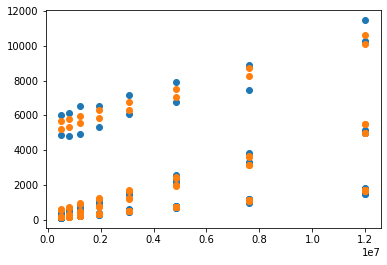

In [423]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Histogram 

In [524]:
df = pd.read_csv("../result/histogram_processing.csv")
df["time"] = df["time"]*1000

In [525]:
alt.Chart(df).mark_line().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("nbins",type="ordinal")
)

alt.Chart(...)

In [526]:
N = np.array(df["nPts"])
Nbin = np.array(df["nbins"])
y = np.array(df["time"])
X = np.array([N,Nbin])

In [527]:
from scipy.optimize import curve_fit
def func(x, a, b,c):
    return a + b * x[0]+ c*x[1] #+ d*x[0]*x[1]

In [528]:
popt, pcov = curve_fit(func, X,y)
popt

array([ 9.87710714e+00,  1.45973912e-05, -3.55318152e-02])

In [529]:
y_pred = func(X,*popt)

In [530]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 1.7477770161289075


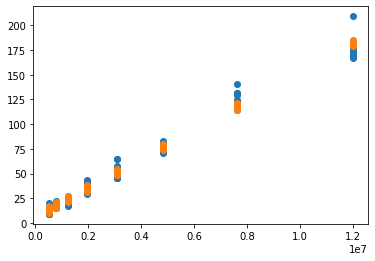

In [531]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

In [439]:
# Verify that coefficient value is the same with linear fitting
coeff, residuals, rank, singular_values, rcond = np.polyfit(N,y,1,full=True)
print ("Coefficients:",coeff)
print ("error:",residuals[0])

Coefficients: [1.45973912e-05 6.50158480e+00]
error: 4138.522597218866


Histogram processing speed has no dependence on the number of bins

###  Heatmap Cost Model

In [532]:
df = pd.read_csv("../result/heatmap_processing.csv")
df["time"] = df["time"]*1000
df.nbin = df.nbin.astype(int)

In [533]:
alt.Chart(df).mark_line().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("nbin",type="ordinal"),
    row="mark"
)

alt.Chart(...)

In [534]:
vdf = df[df["mark"]=="heatmap"]

In [537]:
N = np.array(vdf["nPts"])
# Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])

In [541]:
from scipy.optimize import curve_fit
def func(x, a, b,c):
    return a + b * x[0]+ c*x[1]

In [542]:
popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [ 2.69949773e+00  4.65653034e-06 -1.02252404e-03]


In [546]:
y_pred = func(X,*popt)

In [547]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 0.45149202892896506


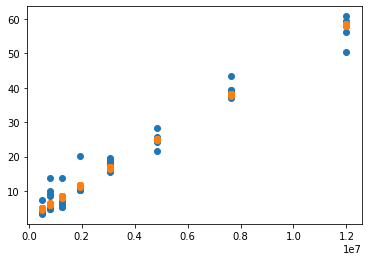

In [548]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

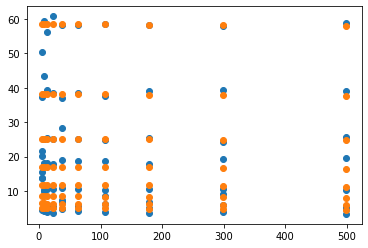

In [549]:
dim = 1
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

- Heatmap processing time is also not very dependent on number of bins/cells. It is also not strongly dependent on the number of data points since the data has already been binned into fixed number of cells

In [550]:
vdf = df[df["mark"]=="categorical color heatmap"]

In [551]:
N = np.array(vdf["nPts"])
# Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])
def func(x, a, b,c):
    return a + b * x[0]+ c*x[1]# + d * x[0]*x[1]

In [552]:
popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [ 1.92907861e+00  8.44846896e-06 -5.29141747e-04]


In [553]:
y_pred = func(X,*popt)

In [554]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 0.29876532228179226


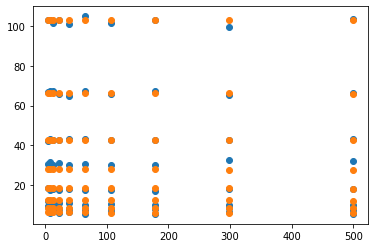

In [555]:
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

In [556]:
vdf = df[df["mark"]=="quantitative color heatmap"]

In [562]:
N = np.array(vdf["nPts"])
# Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])
def func(x, a, b,c):
    return a + b * x[0]+ c*x[1]# + d * x[0]*x[1]

popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [ 2.25774416e+00  5.09923429e-06 -6.89956779e-03]


In [563]:
y_pred = func(X,*popt)

In [564]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 1.3054657748257796


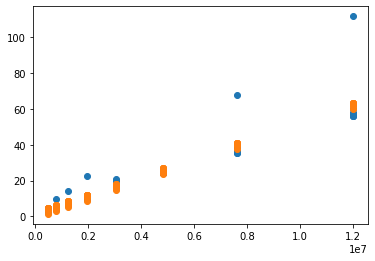

In [565]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')